

    BA.2 mutations:
        A67V: A nucleotide change from A (Adenine) to T (Thymine) at position 23063 in the Spike (S) gene.
        Y145H: A nucleotide change from T (Thymine) to C (Cytosine) at position 28280 in the Nucleocapsid (N) gene.
        T478K: A nucleotide change from T (Thymine) to A (Adenine) at position 26144 in the Spike (S) gene.

    BA.5 mutations:
        H655Y: A nucleotide change from C (Cytosine) to T (Thymine) at position 22917 in the Spike (S) gene.
        N679K: A nucleotide change from T (Thymine) to G (Guanine) at position 22941 in the Spike (S) gene.


Load mutation profile defintion for Omicron BA.2

In [1]:
%%bash
wget https://github.com/cbg-ethz/cojac/raw/dev/voc/omicron_ba2_mutations_full.yaml

--2024-01-12 10:17:17--  https://github.com/cbg-ethz/cojac/raw/dev/voc/omicron_ba2_mutations_full.yaml
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cbg-ethz/cojac/dev/voc/omicron_ba2_mutations_full.yaml [following]
--2024-01-12 10:17:17--  https://raw.githubusercontent.com/cbg-ethz/cojac/dev/voc/omicron_ba2_mutations_full.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2441 (2.4K) [text/plain]
Saving to: ‘omicron_ba2_mutations_full.yaml’

     0K ..                                                    100% 7.97M=0s

2024-01-12 10:17:18 (7.97 MB/s) - ‘omicron_ba2_mutations_full.yaml’ saved 

Load mutation profile defintion for Omicron BA.2

In [2]:
%%bash
wget https://github.com/cbg-ethz/cojac/raw/dev/voc/omicron_ba5_mutations_full.yaml

--2024-01-12 10:17:18--  https://github.com/cbg-ethz/cojac/raw/dev/voc/omicron_ba5_mutations_full.yaml
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cbg-ethz/cojac/dev/voc/omicron_ba5_mutations_full.yaml [following]
--2024-01-12 10:17:19--  https://raw.githubusercontent.com/cbg-ethz/cojac/dev/voc/omicron_ba5_mutations_full.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2004 (2.0K) [text/plain]
Saving to: ‘omicron_ba5_mutations_full.yaml’

     0K .                                                     100% 9.65M=0s

2024-01-12 10:17:19 (9.65 MB/s) - ‘omicron_ba5_mutations_full.yaml’ saved 

In [1]:
import yaml
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load BA.2 and BA.5 mutations

In [2]:
# load mutations 

with open('omicron_ba2_mutations_full.yaml', 'r') as f:
    ba2_muts = yaml.safe_load(f)
f.close()

with open('omicron_ba5_mutations_full.yaml', 'r') as f:
    ba5_muts = yaml.safe_load(f)
f.close()

In [3]:
all_ba2_pos = set(list(ba2_muts['mut'].keys()) + list(ba2_muts['shared'].keys()))
all_ba5_pos = set(list(ba5_muts['mut'].keys()) + list(ba5_muts['shared'].keys()))

In [4]:
only_ba2 = all_ba2_pos - all_ba5_pos
print("only BA.2:", len(only_ba2))
print(only_ba2)

only_ba5 = all_ba5_pos - all_ba2_pos
print("only BA.5:", len(only_ba5))
print(only_ba5)

only BA.2: 5
{23040, 9866, 26858, 27382, 27259}
only BA.5: 9
{12160, 26529, 21765, 22917, 29734, 23018, 27889, 28882, 28883}


In [5]:
df_muts_def = pd.DataFrame(columns=['position', 'BA.2'])
df_tmp = pd.DataFrame(columns=['position', 'BA.5'])

df_muts_def['position'] = list(ba2_muts['mut'].keys()) + list(ba2_muts['shared'].keys())
df_muts_def['BA.2']=1

df_tmp['position'] = list(ba5_muts['mut'].keys()) + list(ba5_muts['shared'].keys())
df_tmp['BA.5']=1

df_muts_def = pd.merge(df_muts_def, df_tmp, left_on="position", right_on='position', how='outer')
df_muts_def = df_muts_def.fillna(0)

In [6]:
df_muts_def

,position,BA.2,BA.5
0,670,1.0,1.0
1,2790,1.0,1.0
2,4184,1.0,1.0
3,4321,1.0,1.0
4,9424,1.0,1.0
...,...,...,...
69,27889,0.0,1.0
70,12160,0.0,1.0
71,28882,0.0,1.0
72,28883,0.0,1.0


## Positions of mutations that are unique to either BA.2 or BA.5

In [7]:
positions_of_interest = only_ba2.union(only_ba5) 

## Amplicons where does mutations are positioned

In [8]:
# now we want to find the amplicons where those interesting positions are in

fname_bed = "../../../../resources/SARS-CoV-2.insert.bed"

amplicons_bed = pd.read_table(
        fname_bed,
        index_col=False,
        names=["ref", "start", "stop", "amp_num", "pool", "strand"],
        dtype={
            "ref": "str",
            "start": "uint32",
            "stop": "uint32",
            "amp_num": "str",
        },
    )

def check_for_positions_of_interest(row):
    bed_list_pos = list(range(row['start'], row['stop']+1))
    for pos in positions_of_interest:
        if pos in bed_list_pos:
            return True 
    return False

amplicons_bed["positions_of_interest"] = amplicons_bed.apply(check_for_positions_of_interest, axis=1)

In [9]:
amplicons_of_interest = amplicons_bed[amplicons_bed['positions_of_interest']==True]
amplicons_of_interest

,ref,start,stop,amp_num,pool,strand,positions_of_interest
32,NC_045512.2,9805,10150,SARS-CoV-2_INSERT_33,1,+,True
39,NC_045512.2,11963,12317,SARS-CoV-2_INSERT_40,2,+,True
71,NC_045512.2,21561,21904,SARS-CoV-2_INSERT_72,2,+,True
75,NC_045512.2,22774,23028,SARS-CoV-2_INSERT_76,2,+,True
76,NC_045512.2,22974,23327,SARS-CoV-2_INSERT_77,1,+,True
87,NC_045512.2,26277,26635,SARS-CoV-2_INSERT_88,2,+,True
88,NC_045512.2,26621,26956,SARS-CoV-2_INSERT_89,1,+,True
90,NC_045512.2,27177,27534,SARS-CoV-2_INSERT_91,1,+,True
92,NC_045512.2,27726,28082,SARS-CoV-2_INSERT_93,1,+,True
95,NC_045512.2,28536,28893,SARS-CoV-2_INSERT_96,2,+,True


In [10]:
def get_amplicon(row):
    for idex, row_amplicons_bed in amplicons_bed.iterrows():
        if row['position'] in list(range(row_amplicons_bed['start'], row_amplicons_bed['stop'])):
            return row_amplicons_bed['amp_num']

df_muts_def['amplicon'] = df_muts_def.apply(get_amplicon,axis=1)

In [11]:
df_muts_def['shared'] = df_muts_def.apply(lambda row: 1 if row["BA.2"]==row["BA.5"] else 0, axis=1)

## Load sample information - location and date

In [12]:
# map sample name to location and date 

fname_sample_names = "../../../../resources/timeline.tsv"

df_mapping = pd.read_csv(fname_sample_names, sep="\t")
df_mapping['my_sample_name'] = df_mapping["sample"] + "/"+df_mapping["batch"]

def f_sample2location(row):
    samplename = row['sample']
    
    location = df_mapping[df_mapping['my_sample_name']==samplename]['location'].values[0]    
    return location

def f_sample2date(row):
    samplename = row['sample']
    date = df_mapping[df_mapping['my_sample_name']==samplename]['date'].values[0]
    
    return date

## Load co-occ mutations

In [15]:
# import co-occ mutations 

df_cocc = pd.read_csv("../../results/old_files/all_cooccurring_mutations.csv")
df_cocc = df_cocc[['haplotype_id', 'start', 'end', 'coverage', 'position', 'ref', 'var', 'freq', 'support',
       'sample']]

# map sample name to location and date 
#df_cocc['location'] = df_cocc.apply(f_sample2location, axis=1)
df_cocc['date'] = df_cocc.apply(f_sample2date, axis=1)

In [16]:
df_cocc['date'].unique()

array(['2022-04-07', '2022-04-14', '2022-04-21', '2022-04-28',
       '2022-05-05', '2022-05-12', '2022-04-01', '2022-04-08',
       '2022-04-15', '2022-04-22', '2022-04-29', '2022-05-06',
       '2022-05-13', '2022-04-02', '2022-04-09', '2022-04-23',
       '2022-05-07', '2022-05-14', '2022-05-30', '2022-05-16',
       '2022-04-03', '2022-04-17', '2022-04-24', '2022-05-08',
       '2022-05-15', '2022-04-04', '2022-04-11', '2022-04-18',
       '2022-04-25', '2022-05-09', '2022-04-05', '2022-04-12',
       '2022-04-26', '2022-05-10', '2022-04-06', '2022-04-13',
       '2022-04-20', '2022-05-04', '2022-05-11', '2022-05-18'],
      dtype=object)

In [17]:
df_cocc["mutation_id"] = df_cocc["ref"] + df_cocc["position"].astype(str) + df_cocc["var"]

## plot something

In [18]:
df_res = df_cocc[df_cocc['position'].isin(df_muts_def['position'])]
df_res = pd.merge(df_res, df_muts_def, left_on = 'position', right_on = 'position', how='left')

def get_mutation_label(row):
    if row['shared'] == 1:
        return row['mutation_id'] + " (shared)"
    else:
        if row['BA.2'] ==1:
            return row['mutation_id'] + " (BA.2)"
        if row['BA.5'] ==1:
            return row['mutation_id'] + " (BA.5)"

df_res['mutation_label'] = df_res.apply(get_mutation_label, axis=1)

In [19]:
df_res = df_res.drop_duplicates()

In [20]:
df_res[df_res['shared']==0]['amplicon'].unique()

array(['SARS-CoV-2_INSERT_33', 'SARS-CoV-2_INSERT_77',
       'SARS-CoV-2_INSERT_91', 'SARS-CoV-2_INSERT_89',
       'SARS-CoV-2_INSERT_93', 'SARS-CoV-2_INSERT_40',
       'SARS-CoV-2_INSERT_76'], dtype=object)

In [21]:
print_amplicons = df_res[df_res['shared']==0]['amplicon'].unique()

In [22]:
# list of mutation labels that should be drop since nothing happens there 

drop_mutation = ['A23040T (BA.2)',
                 'A27259T (BA.2)',
                 'G27382T (BA.2)',
                 'G27382A (BA.2)',
                 'T21765C (BA.5)',
                 'T22917A (BA.5)',
                 'T22917C (BA.5)',
                 'T23018A (BA.5)',
                 'G26529A (BA.5)',
                 'G28883A (BA.5)',
                 'G28883T (BA.5)',
                 'G28883C (BA.5)',
                 'G28882A (BA.5)', 
                 'G12160T (BA.5)'
                ]

In [23]:
data['mutation_label'].unique()

NameError: name 'data' is not defined

Text(0.5, 79.5, '')

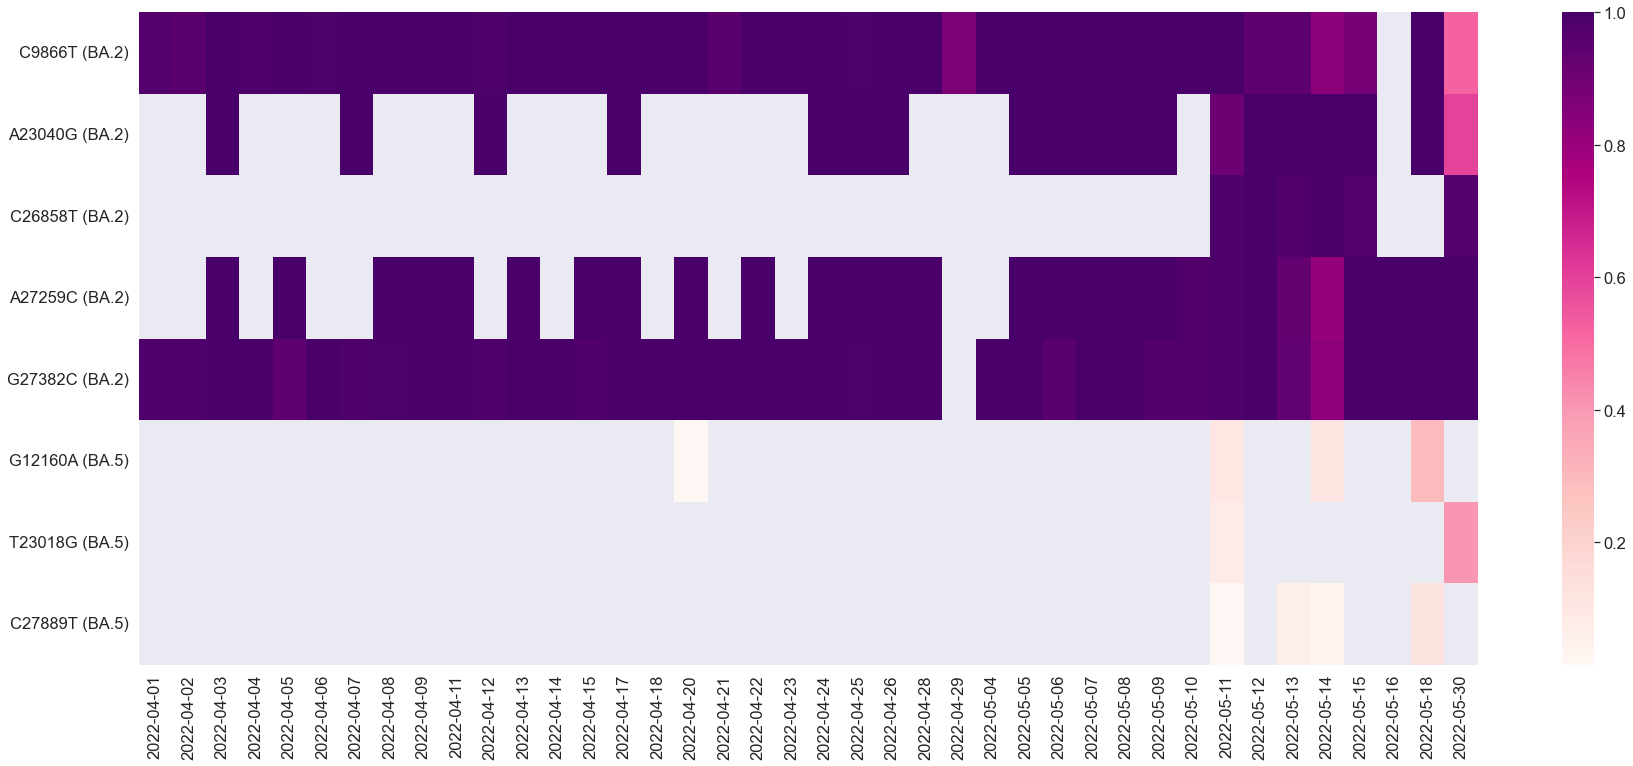

In [24]:
data = df_res[df_res['amplicon'].isin(print_amplicons)][['freq', 'mutation_label', 'date', 'position', "BA.5"]]
data = data[data['position'].isin(list(only_ba5) + list(only_ba2))]

data = data[~data['mutation_label'].isin(drop_mutation)]

orders = data.sort_values(['BA.5', 'position'])['mutation_label'].unique()
sns.set(font_scale=1.5)

fig = plt.figure(figsize = (30, 12))

ax = fig.add_subplot(111)
sns.heatmap(data.pivot_table(index='mutation_label', values='freq', columns='date').reindex(index=orders),
            cmap="RdPu", ax=ax)

ax.set_ylabel('')
ax.set_xlabel('')

#fig.savefig('heatmap_freq_ba2_ba5_specific_mutations.svg')

In [ ]:
data = df_res[df_res['amplicon'].isin(print_amplicons)][['freq', 'mutation_label', 'date', 'position', "BA.5"]]
data = data[data['position'].isin(list(only_ba5) + list(only_ba2))]

data = data[~data['mutation_label'].isin(drop_mutation)]

orders = data.sort_values(['BA.5', 'position'])['mutation_label'].unique()
sns.set(font_scale=1.5)

fig = plt.figure(figsize = (30, 12))

ax = fig.add_subplot(111)
sns.heatmap(data.pivot_table(index='mutation_label', values='freq', columns='date').reindex(index=orders),
            cmap="RdPu", ax=ax)

ax.set_ylabel('')
ax.set_xlabel('')

#fig.savefig('heatmap_freq_ba2_ba5_specific_mutations.svg')

In [33]:
data['position'].unique()

array([ 9866, 23040, 27259, 27382, 12160, 22917, 23018, 26858, 27889])

---------

## ---- old stuff ---

------------

<AxesSubplot: xlabel='mutation_label', ylabel='date'>

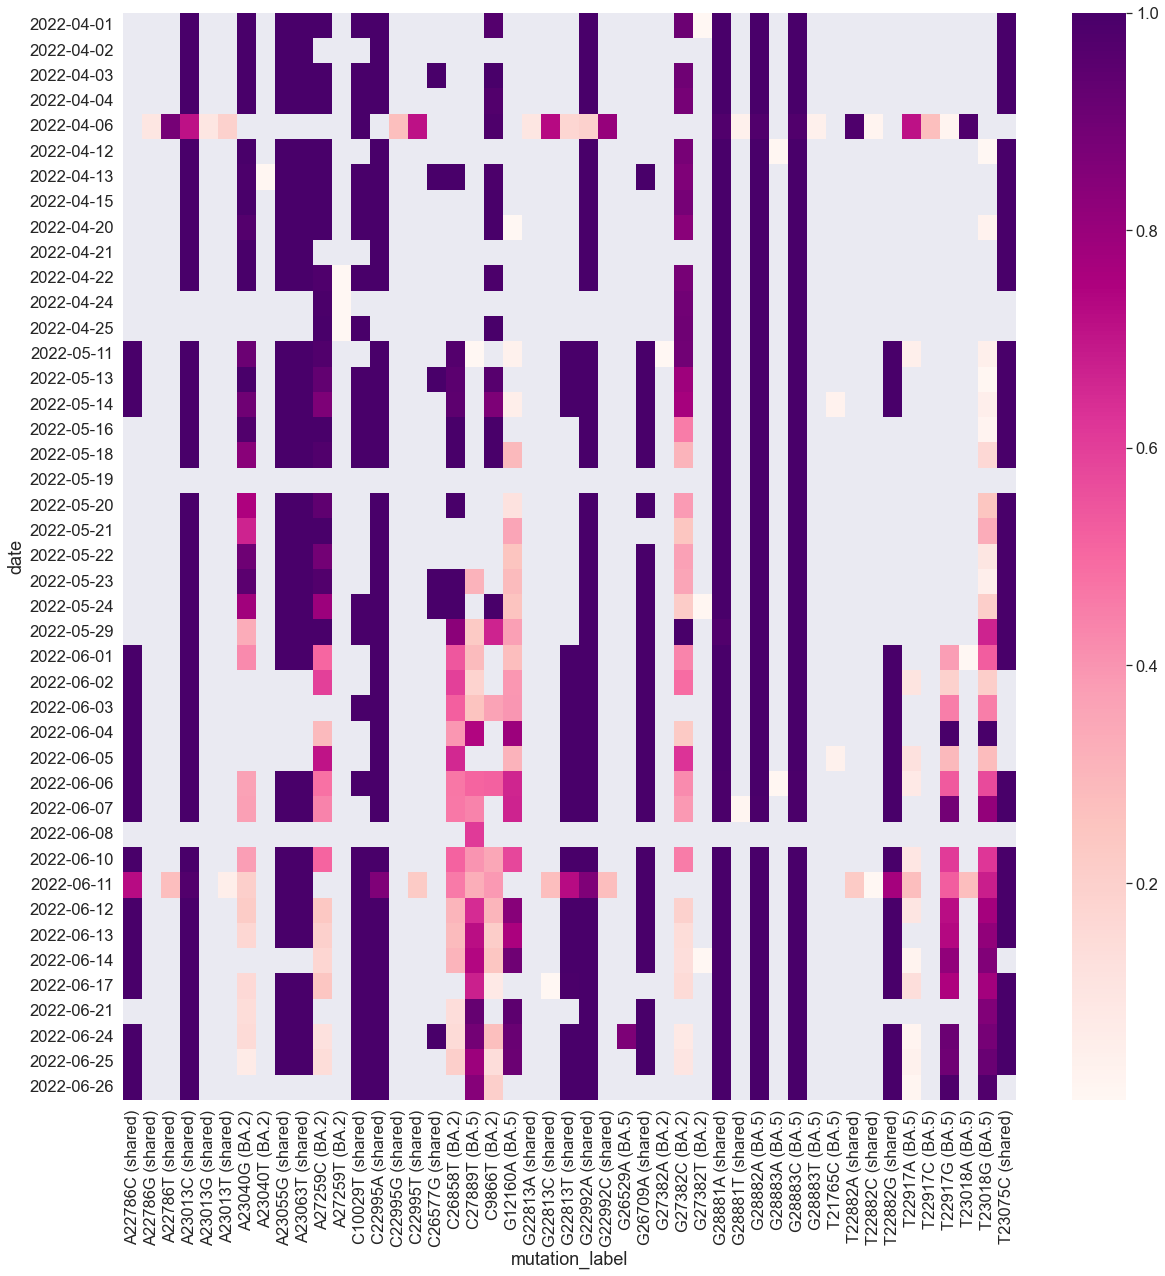

In [23]:
data = df_res[df_res['amplicon'].isin(print_amplicons)][['freq', 'mutation_label', 'date', 'position']]
orders = data.sort_values('position')['mutation_label'].unique()
sns.set(font_scale=1.5)

fig = plt.figure(figsize = (20, 20))

ax = fig.add_subplot(111)
sns.heatmap(data.pivot_table(index='date', values='freq', columns='mutation_label'),
            cmap="RdPu", ax=ax)


<AxesSubplot: xlabel='mutation_label', ylabel='date'>

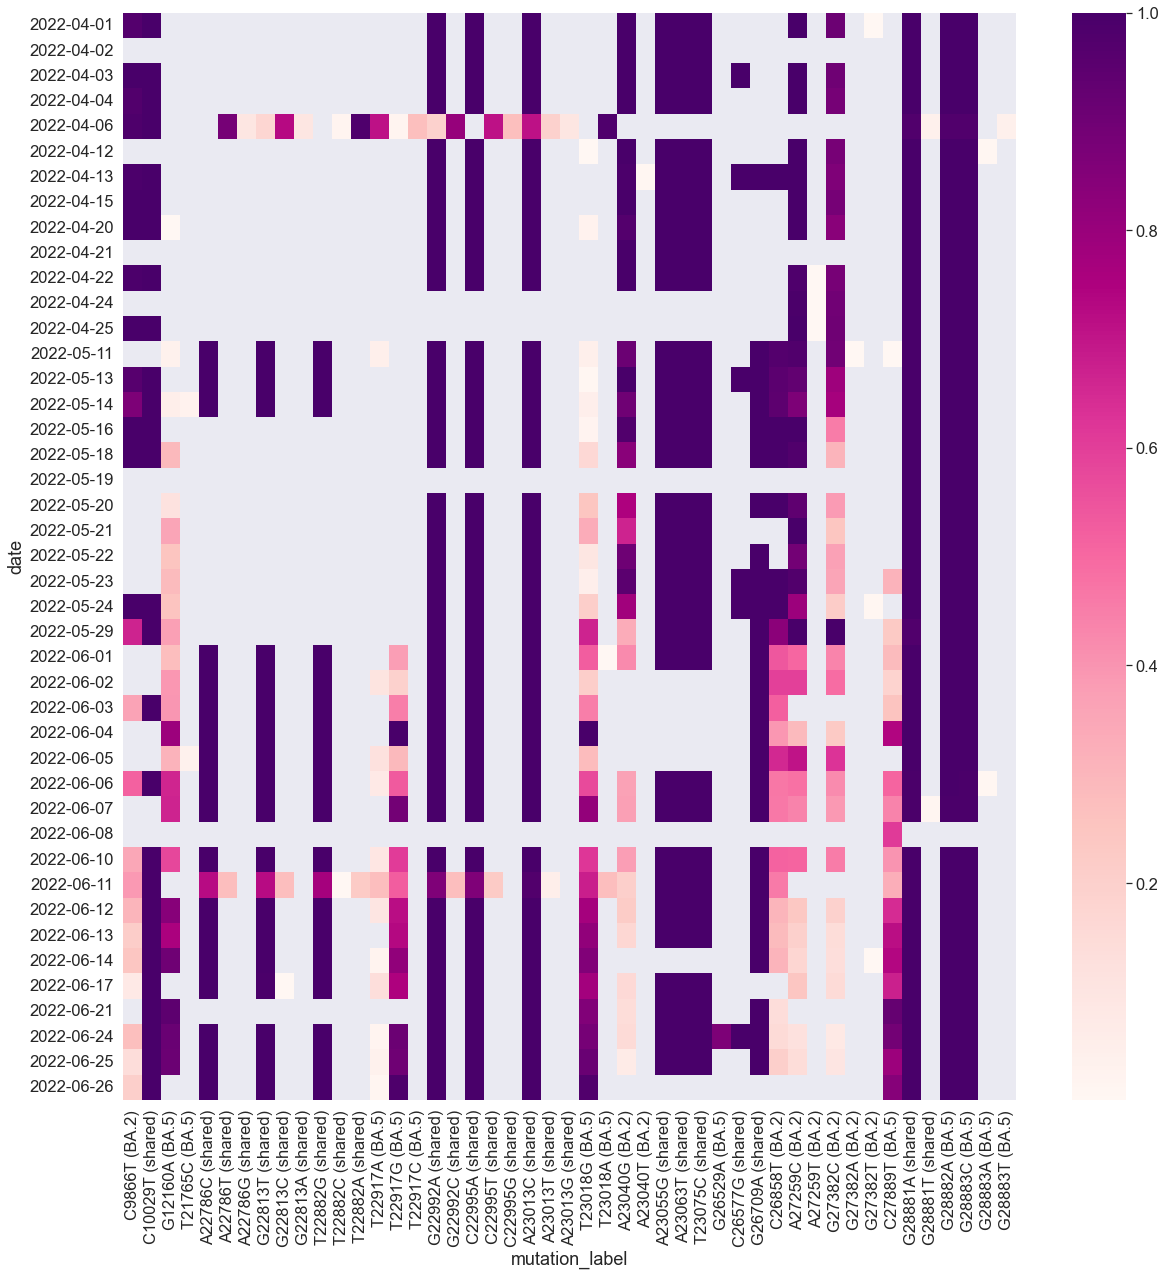

In [24]:
data = df_res[df_res['amplicon'].isin(print_amplicons)][['freq', 'mutation_label', 'date', 'position']]
orders = data.sort_values('position')['mutation_label'].unique()
sns.set(font_scale=1.5)

fig = plt.figure(figsize = (20, 20))

ax = fig.add_subplot(111)
sns.heatmap(data.pivot_table(index='date', values='freq', columns='mutation_label').reindex(columns=orders),
            cmap="RdPu", ax=ax)


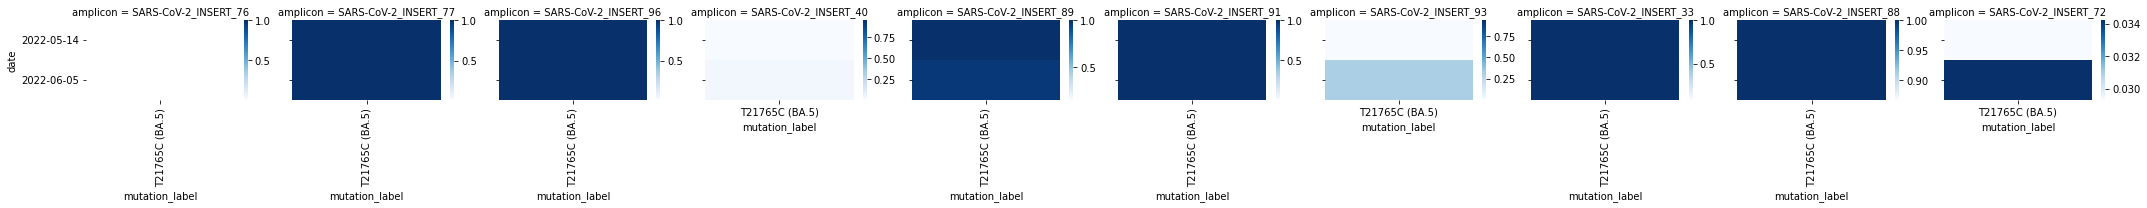

In [235]:
# Define the FacetGrid with the desired row and column variables

data = df_res[df_res['amplicon'].isin(print_amplicons)][['amplicon', 'freq', 'mutation_label', 'date']]

def facet_heatmap(data, color, **kws):
    data = data.pivot_table(index="date", columns='mutation_label', values='freq')
    sns.heatmap(data, cmap='Blues', **kws)

g = sns.FacetGrid(data, col="amplicon", sharey=True)
g.map_dataframe(facet_heatmap)


In [237]:
df_res

,haplotype_id,start,end,coverage,position,ref,var,freq,support,sample,date,mutation_id,BA.2,BA.5,amplicon,shared,mutation_label
0,haplotype0-50-407,50,407,21,241,C,T,1.000000,1.00000,A2_10_2022_04_21/20220506_HTYK5DRXY,2022-04-21,C241T,1.0,1.0,SARS-CoV-2_INSERT_1,1,C241T (shared)
2,haplotype0-344-704,344,704,39056,670,T,G,1.000000,1.00000,A2_10_2022_04_21/20220506_HTYK5DRXY,2022-04-21,T670G,1.0,1.0,SARS-CoV-2_INSERT_2,1,T670G (shared)
3,haplotype0-666-1016,666,1016,6892,670,T,G,1.000000,1.00000,A2_10_2022_04_21/20220506_HTYK5DRXY,2022-04-21,T670G,1.0,1.0,SARS-CoV-2_INSERT_2,1,T670G (shared)
4,haplotype0-10099-10464,10099,10464,4166,10198,C,T,1.000000,1.00000,A2_10_2022_04_21/20220506_HTYK5DRXY,2022-04-21,C10198T,1.0,1.0,SARS-CoV-2_INSERT_34,1,C10198T (shared)
5,haplotype0-10099-10464,10099,10464,4166,10447,G,A,1.000000,1.00000,A2_10_2022_04_21/20220506_HTYK5DRXY,2022-04-21,G10447A,1.0,1.0,SARS-CoV-2_INSERT_34,1,G10447A (shared)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,haplotype3-25979-26337,25979,26337,2346,26060,C,T,1.000000,1.00000,H1_10_2022_06_08/20220624_H327YDRX2,2022-06-08,C26060T,1.0,1.0,SARS-CoV-2_INSERT_87,1,C26060T (shared)
3892,haplotype3-25979-26337,25979,26337,2346,26270,C,T,1.000000,1.00000,H1_10_2022_06_08/20220624_H327YDRX2,2022-06-08,C26270T,1.0,1.0,SARS-CoV-2_INSERT_87,1,C26270T (shared)
3894,haplotype6-27473-27825,27473,27825,637,27807,C,T,1.000000,1.00000,H1_10_2022_06_08/20220624_H327YDRX2,2022-06-08,C27807T,1.0,1.0,SARS-CoV-2_INSERT_92,1,C27807T (shared)
3896,haplotype0-27726-28081,27726,28081,935,27807,C,T,1.000000,0.99999,H1_10_2022_06_08/20220624_H327YDRX2,2022-06-08,C27807T,1.0,1.0,SARS-CoV-2_INSERT_92,1,C27807T (shared)


ValueError: The number of observations cannot be determined on an empty distance matrix.

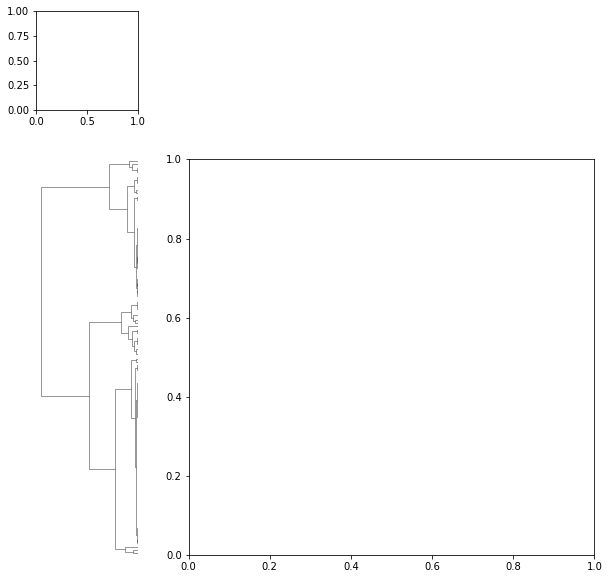

In [240]:
data = df_res.pivot_table(values='freq', index="mutation_label")

sns.clustermap(data)

## Filter co-occ mutations for amplicons of interest 

In [77]:
df_cocc[df_cocc['position'].isin(only_ba5)]

,haplotype_id,start,end,coverage,position,ref,var,freq,support,sample,date,mutation_id
250,haplotype0-28536-28892,28536,28892,18710,28882,G,A,1.000000,1.000000,A2_10_2022_04_21/20220506_HTYK5DRXY,2022-04-21,G28882A
251,haplotype0-28536-28892,28536,28892,18710,28883,G,C,1.000000,1.000000,A2_10_2022_04_21/20220506_HTYK5DRXY,2022-04-21,G28883C
256,haplotype0-28849-29205,28849,29205,14435,28882,G,A,1.000000,1.000000,A2_10_2022_04_21/20220506_HTYK5DRXY,2022-04-21,G28882A
257,haplotype0-28849-29205,28849,29205,14435,28883,G,C,1.000000,1.000000,A2_10_2022_04_21/20220506_HTYK5DRXY,2022-04-21,G28883C
318,haplotype0-28536-28892,28536,28892,3122,28882,G,A,1.000000,0.999999,A2_10_2022_05_19/20220603_H7WH5DRX2,2022-05-19,G28882A
...,...,...,...,...,...,...,...,...,...,...,...,...
30169,haplotype0-28536-28892,28536,28892,7957,28882,G,A,1.000000,1.000000,H1_10_2022_06_01/20220617_H7FWCDRX2,2022-06-01,G28882A
30170,haplotype0-28536-28892,28536,28892,7957,28883,G,C,1.000000,1.000000,H1_10_2022_06_01/20220617_H7FWCDRX2,2022-06-01,G28883C
30176,haplotype0-28849-29205,28849,29205,8878,28882,G,A,1.000000,1.000000,H1_10_2022_06_01/20220617_H7FWCDRX2,2022-06-01,G28882A
30177,haplotype0-28849-29205,28849,29205,8878,28883,G,C,1.000000,1.000000,H1_10_2022_06_01/20220617_H7FWCDRX2,2022-06-01,G28883C


In [105]:
list(amplicons_of_interest['start'])

[9805,
 11963,
 21561,
 22774,
 22974,
 26277,
 26621,
 27177,
 27726,
 28536,
 28849,
 29475]

In [79]:
df_pivot = df_cocc[df_cocc['position'].isin(only_ba5)].pivot_table(values='freq',
                           index=["date"], 
                           columns='mutation_id', 
                          )

<AxesSubplot: xlabel='mutation_id', ylabel='date'>

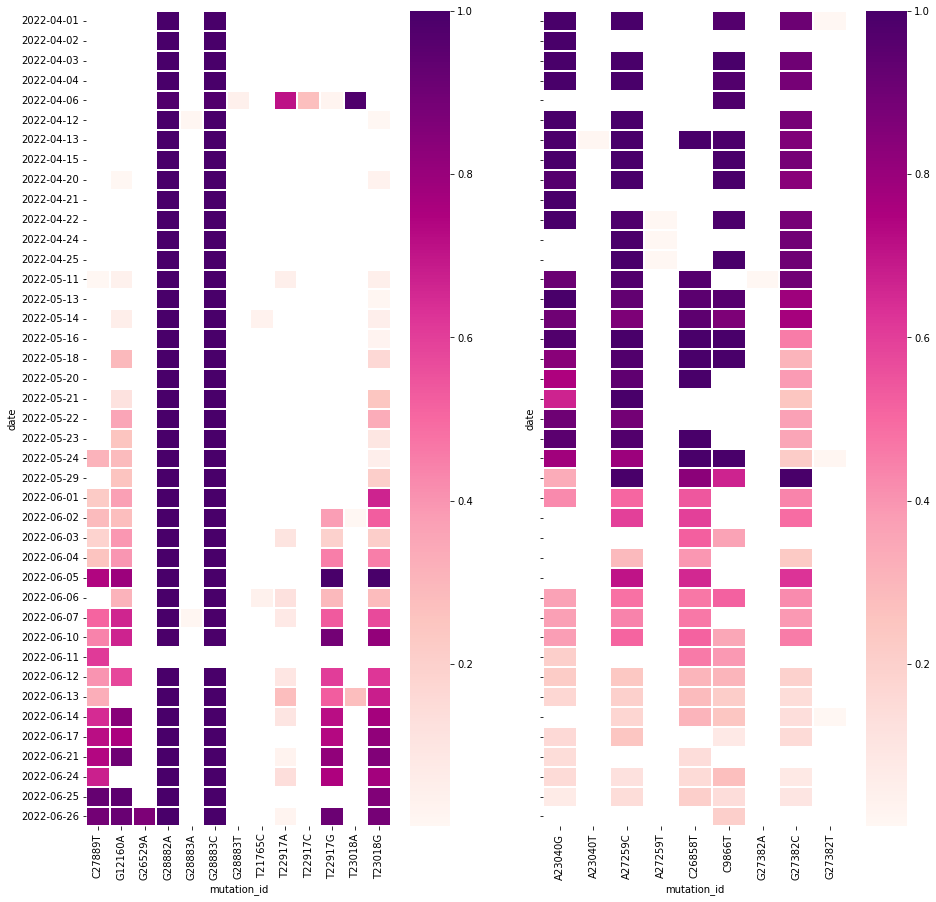

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(15)
fig.set_figheight(15)


df_pivot = df_cocc[df_cocc['position'].isin(only_ba5)].pivot_table(values='freq',
                           index=["date"], 
                           columns='mutation_id', 
                          )

sns.heatmap(df_pivot, 
            cmap="RdPu",
            ax=ax1,
            linewidths=2,)


df_pivot = df_cocc[df_cocc['position'].isin(only_ba2)].pivot_table(values='freq',
                           index=["date"], 
                           columns='mutation_id', 
                          )

sns.heatmap(df_pivot, 
            cmap="RdPu",
            ax=ax2,
            linewidths=2,)

In [97]:
df_spec = df_cocc[(df_cocc['start']==28849) & df_cocc['position'].isin(list(all_ba2_pos) + list(all_ba5_pos)) ]


,haplotype_id,start,end,coverage,position,ref,var,freq,support,sample,date,mutation_id
255,haplotype0-28849-29205,28849,29205,14435,28881,G,A,1.0,1.000000,A2_10_2022_04_21/20220506_HTYK5DRXY,2022-04-21,G28881A
256,haplotype0-28849-29205,28849,29205,14435,28882,G,A,1.0,1.000000,A2_10_2022_04_21/20220506_HTYK5DRXY,2022-04-21,G28882A
257,haplotype0-28849-29205,28849,29205,14435,28883,G,C,1.0,1.000000,A2_10_2022_04_21/20220506_HTYK5DRXY,2022-04-21,G28883C
320,haplotype2-28849-29205,28849,29205,75,28881,G,A,1.0,0.999826,A2_10_2022_05_19/20220603_H7WH5DRX2,2022-05-19,G28881A
321,haplotype2-28849-29205,28849,29205,75,28882,G,A,1.0,0.999826,A2_10_2022_05_19/20220603_H7WH5DRX2,2022-05-19,G28882A
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,haplotype0-28849-29205,28849,29205,1197,28882,G,A,1.0,1.000000,H1_10_2022_05_18/20220603_H7WH5DRX2,2022-05-18,G28882A
29874,haplotype0-28849-29205,28849,29205,1197,28883,G,C,1.0,1.000000,H1_10_2022_05_18/20220603_H7WH5DRX2,2022-05-18,G28883C
30175,haplotype0-28849-29205,28849,29205,8878,28881,G,A,1.0,1.000000,H1_10_2022_06_01/20220617_H7FWCDRX2,2022-06-01,G28881A
30176,haplotype0-28849-29205,28849,29205,8878,28882,G,A,1.0,1.000000,H1_10_2022_06_01/20220617_H7FWCDRX2,2022-06-01,G28882A


In [101]:
len(list(all_ba2_pos) + list(all_ba5_pos))

134

<AxesSubplot: xlabel='mutation_id', ylabel='date'>

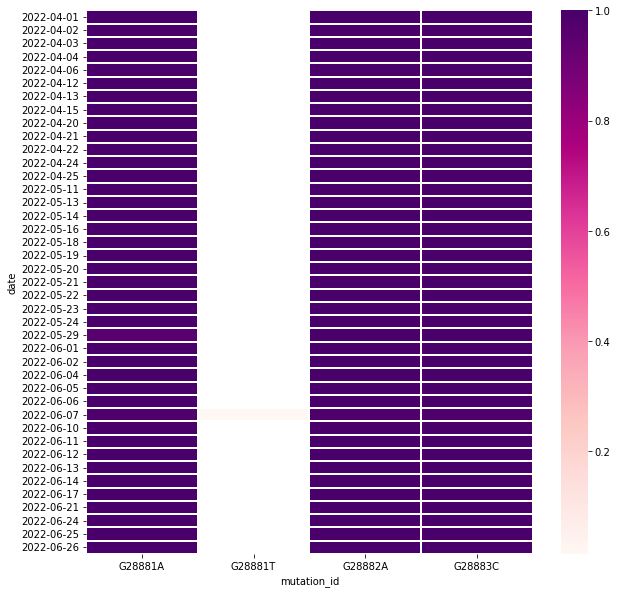

In [100]:
fig = plt.figure(figsize = (10, 10))

df_pivot = df_spec.pivot_table(values='freq',
                           index=["date"], 
                           columns='mutation_id', 
                          )

sns.heatmap(df_pivot, 
            cmap="RdPu",
            linewidths=2,)

<AxesSubplot: xlabel='mutation_id', ylabel='date'>

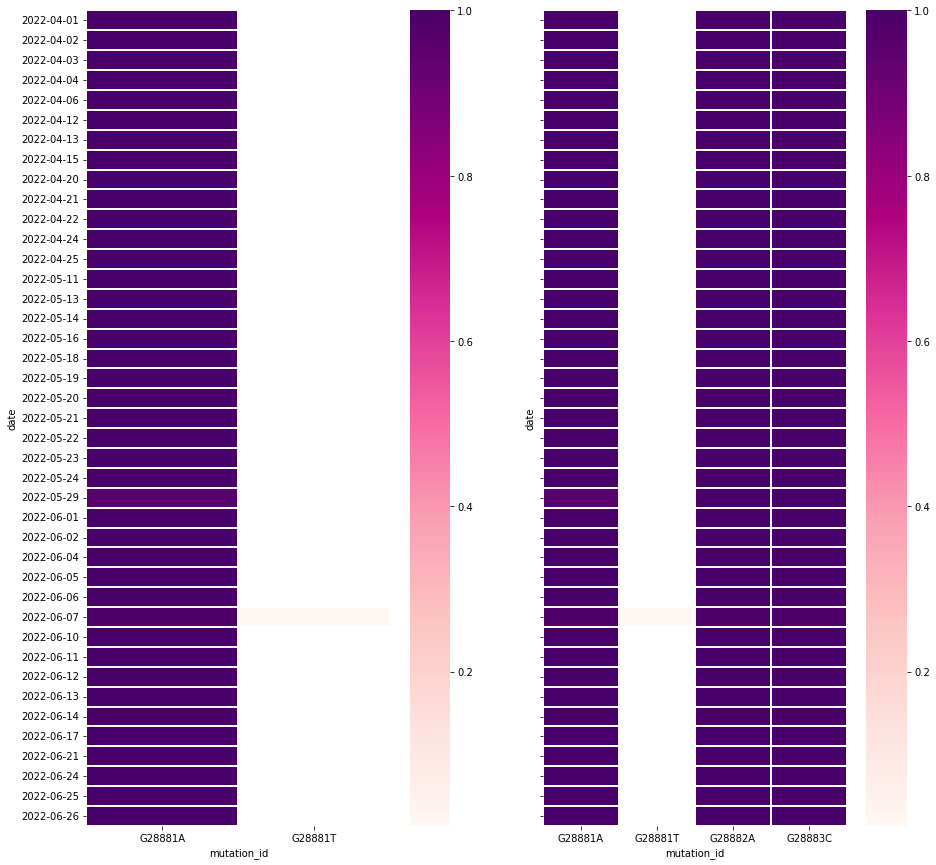

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(15)
fig.set_figheight(15)sl

df_spec = df_cocc[(df_cocc['start']==28849) & df_cocc['position'].isin(list(all_ba2_pos) + list(all_ba5_pos)) ]


df_pivot = df_spec[df_spec['position'].isin(all_ba2_pos)].pivot_table(values='freq',
                           index=["date"], 
                           columns='mutation_id', 
                          )

sns.heatmap(df_pivot, 
            cmap="RdPu",
            ax=ax1,
            linewidths=2,)


df_pivot = df_spec[df_spec['position'].isin(all_ba5_pos)].pivot_table(values='freq',
                           index=["date"], 
                           columns='mutation_id', 
                          )

sns.heatmap(df_pivot, 
            cmap="RdPu",
            ax=ax2,
            linewidths=2,)

In [ ]:
[9805,
 11963,
 21561,
 22774,
 22974,
 26277,
 26621,
 27177,
 27726,
 28536,
 28849,
 28536]


<AxesSubplot: xlabel='mutation_id', ylabel='date'>

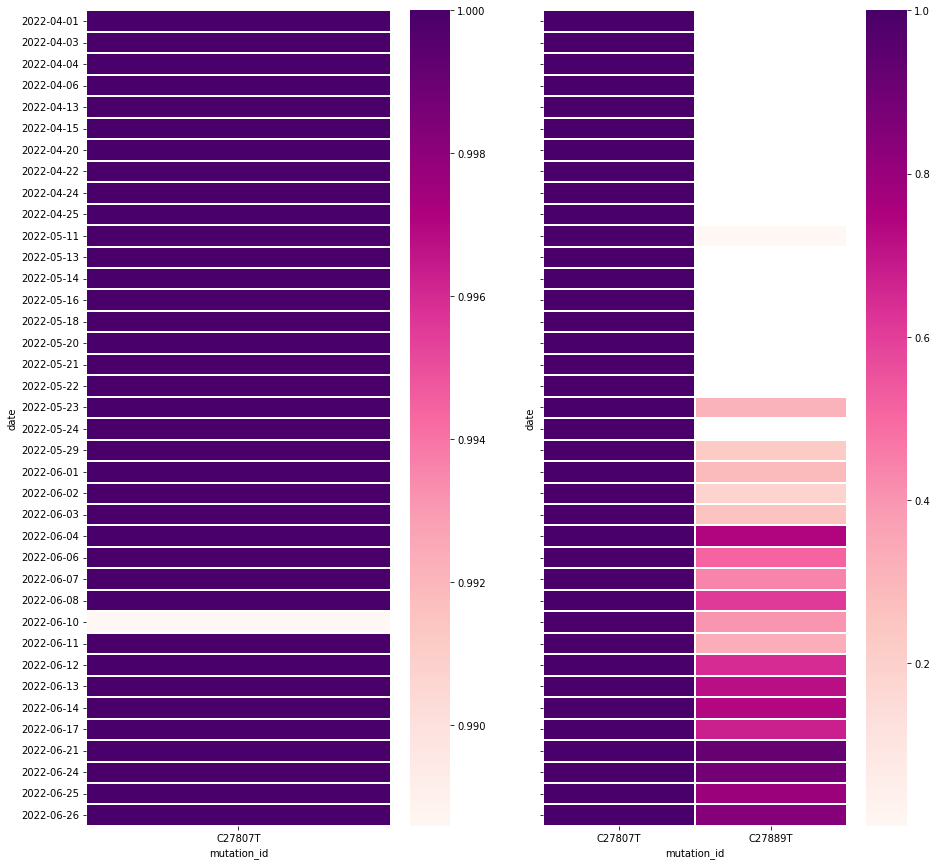

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(15)
fig.set_figheight(15)

df_spec = df_cocc[(df_cocc['start']==27726) & df_cocc['position'].isin(list(all_ba2_pos) + list(all_ba5_pos)) ]


df_pivot = df_spec[df_spec['position'].isin(all_ba2_pos)].pivot_table(values='freq',
                           index=["date"], 
                           columns='mutation_id', 
                          )

sns.heatmap(df_pivot, 
            cmap="RdPu",
            ax=ax1,
            linewidths=2,)


df_pivot = df_spec[df_spec['position'].isin(all_ba5_pos)].pivot_table(values='freq',
                           index=["date"], 
                           columns='mutation_id', 
                          )

sns.heatmap(df_pivot, 
            cmap="RdPu",
            ax=ax2,
            linewidths=2,)

<AxesSubplot: xlabel='mutation_id', ylabel='date'>

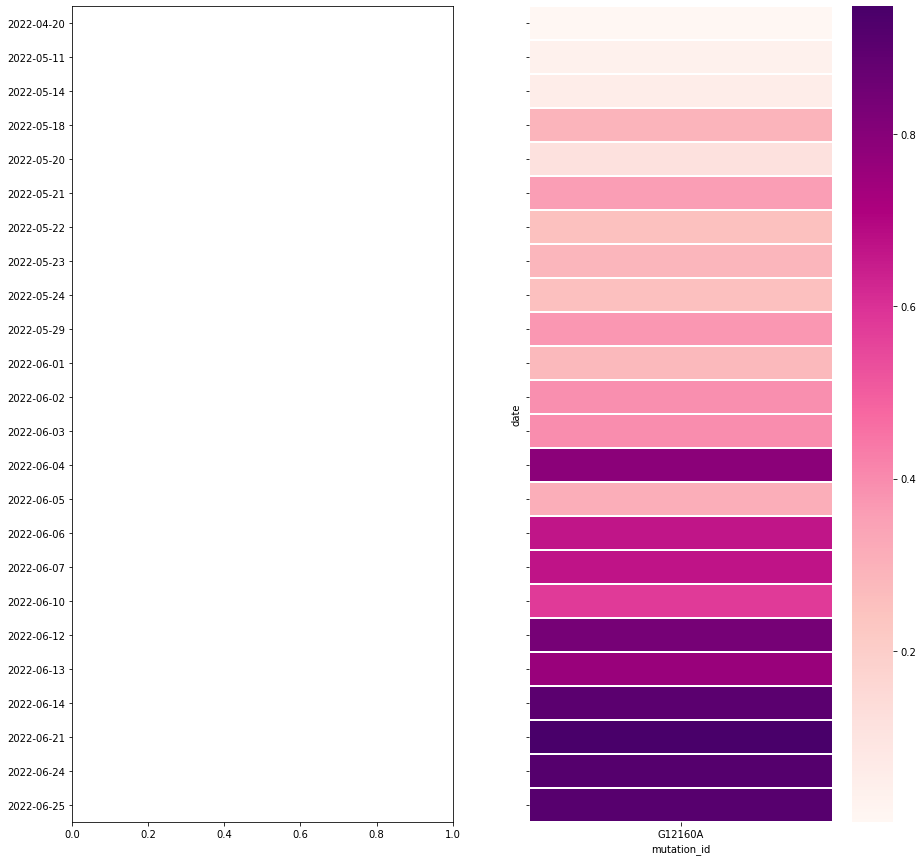

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(15)
fig.set_figheight(15)


df_spec = df_cocc[(df_cocc['start']==11963) & df_cocc['position'].isin(list(all_ba2_pos) + list(all_ba5_pos)) ]


#df_pivot = df_spec[df_spec['position'].isin(all_ba2_pos)].pivot_table(values='freq',
#                           index=["date"], 
#                           columns='mutation_id', 
#                          )
#
#sns.heatmap(df_pivot, 
#            cmap="RdPu",
#            ax=ax1,
#            linewidths=2,)


df_pivot = df_spec[df_spec['position'].isin(all_ba5_pos)].pivot_table(values='freq',
                           index=["date"], 
                           columns='mutation_id', 
                          )

sns.heatmap(df_pivot, 
            cmap="RdPu",
            ax=ax2,
            linewidths=2,)